In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('data-kiem-tra-2.csv')
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1
...,...,...,...,...,...,...
550033,07.11.2013,10,37,18474,199.0,1
550034,18.11.2013,10,37,18474,199.0,1
550035,24.11.2013,10,37,18484,199.0,1
550036,11.11.2013,10,37,19751,99.0,1


# Chuyển định dạng Date

In [37]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y').dt.strftime('%d-%m-%Y')
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10-05-2013,4,58,3773,299.0,1
1,26-05-2013,4,58,3768,249.0,1
2,19-05-2013,4,58,4036,419.0,1
3,25-05-2013,4,58,12878,149.0,1
4,15-05-2013,4,58,12885,148.0,1
...,...,...,...,...,...,...
550033,07-11-2013,10,37,18474,199.0,1
550034,18-11-2013,10,37,18474,199.0,1
550035,24-11-2013,10,37,18484,199.0,1
550036,11-11-2013,10,37,19751,99.0,1


In [38]:
feats = ['truong_1','truong_2','truong_3','truong_4','truong_5']

# Kiểm tra dữ liệu

In [39]:
df.isnull().sum()

date        0
truong_1    0
truong_2    0
truong_3    0
truong_4    0
truong_5    0
dtype: int64

* Dữ liệu không có giá trị nào bị thiếu

In [40]:
# Đổi dữ liệu về dạng ngày từ bé đến lớn
df_sorted = df.sort_values(by="date")
df = df_sorted
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
16065,01-05-2013,4,18,16590,299.0,1
27583,01-05-2013,4,6,16184,249.0,1
32595,01-05-2013,4,5,19537,549.0,1
9160,01-05-2013,4,56,18164,349.0,1
32593,01-05-2013,4,5,19597,99.0,1
...,...,...,...,...,...,...
506871,31-10-2013,9,14,1481,1399.0,1
445199,31-10-2013,9,46,19993,349.0,-1
496507,31-10-2013,9,57,19253,299.0,1
434885,31-10-2013,9,44,3535,999.0,2


In [41]:
df = df.groupby('date').mean()
df

,truong_1,truong_2,truong_3,truong_4,truong_5
date,,,,,
01-05-2013,4.0,29.304022,10275.341513,593.006905,1.114519
01-06-2013,5.0,34.736084,10306.830386,623.678839,1.251692
01-07-2013,6.0,33.036860,10493.618771,686.657065,1.157338
01-08-2013,7.0,32.863878,10262.245658,624.383078,1.140730
01-09-2013,8.0,33.842278,9937.449262,620.668734,1.274666
...,...,...,...,...,...
30-11-2013,10.0,29.607930,10968.565639,913.830837,1.340969
31-05-2013,4.0,31.046650,10158.323155,664.273523,1.142494
31-07-2013,6.0,33.123320,10735.476815,603.719067,1.146841


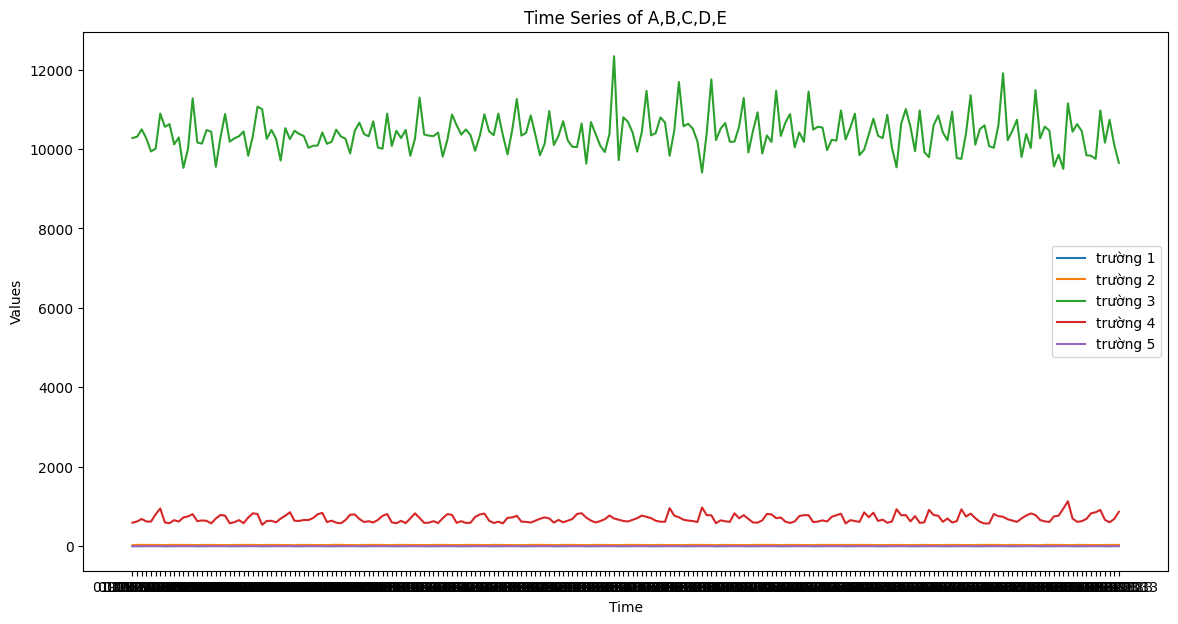

In [42]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['truong_1'], label='trường 1')
plt.plot(df.index, df['truong_2'], label='trường 2')
plt.plot(df.index, df['truong_3'], label='trường 3')
plt.plot(df.index, df['truong_4'], label='trường 4')
plt.plot(df.index, df['truong_5'], label='trường 5')
plt.title('Time Series of A,B,C,D,E')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


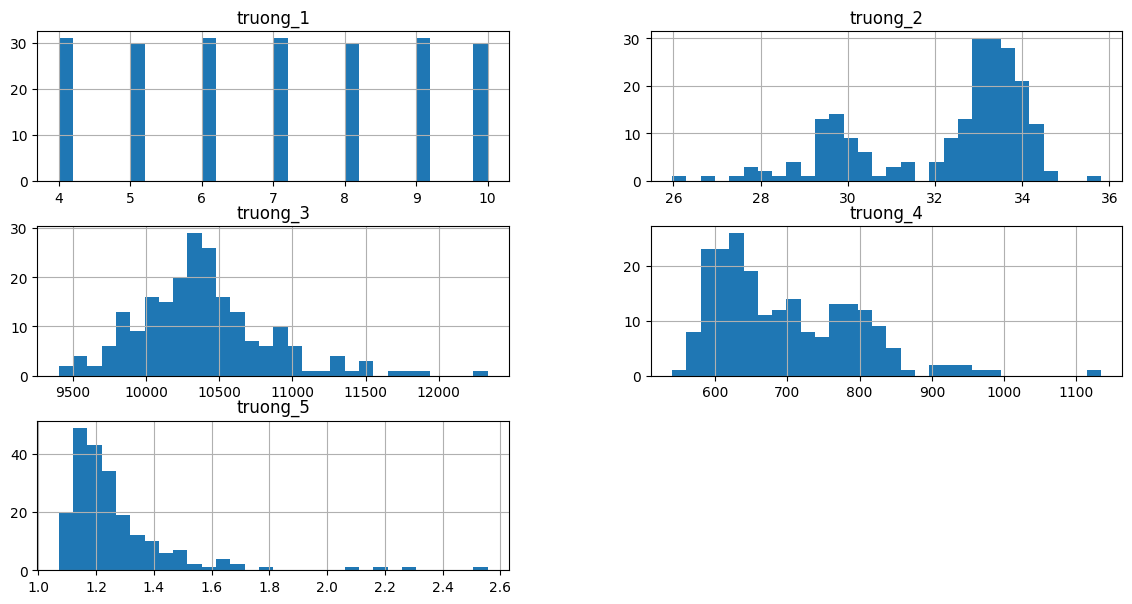

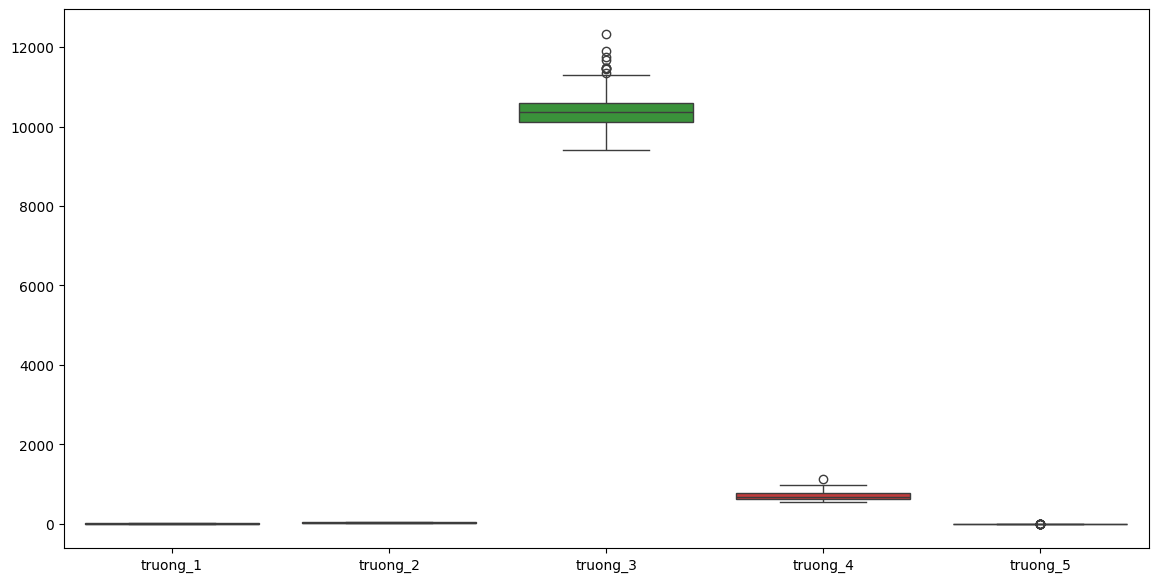

In [43]:
import seaborn as sns
df[feats].hist(bins=30, figsize=(14, 7))
plt.show()

# Box plots
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[feats])
plt.show()

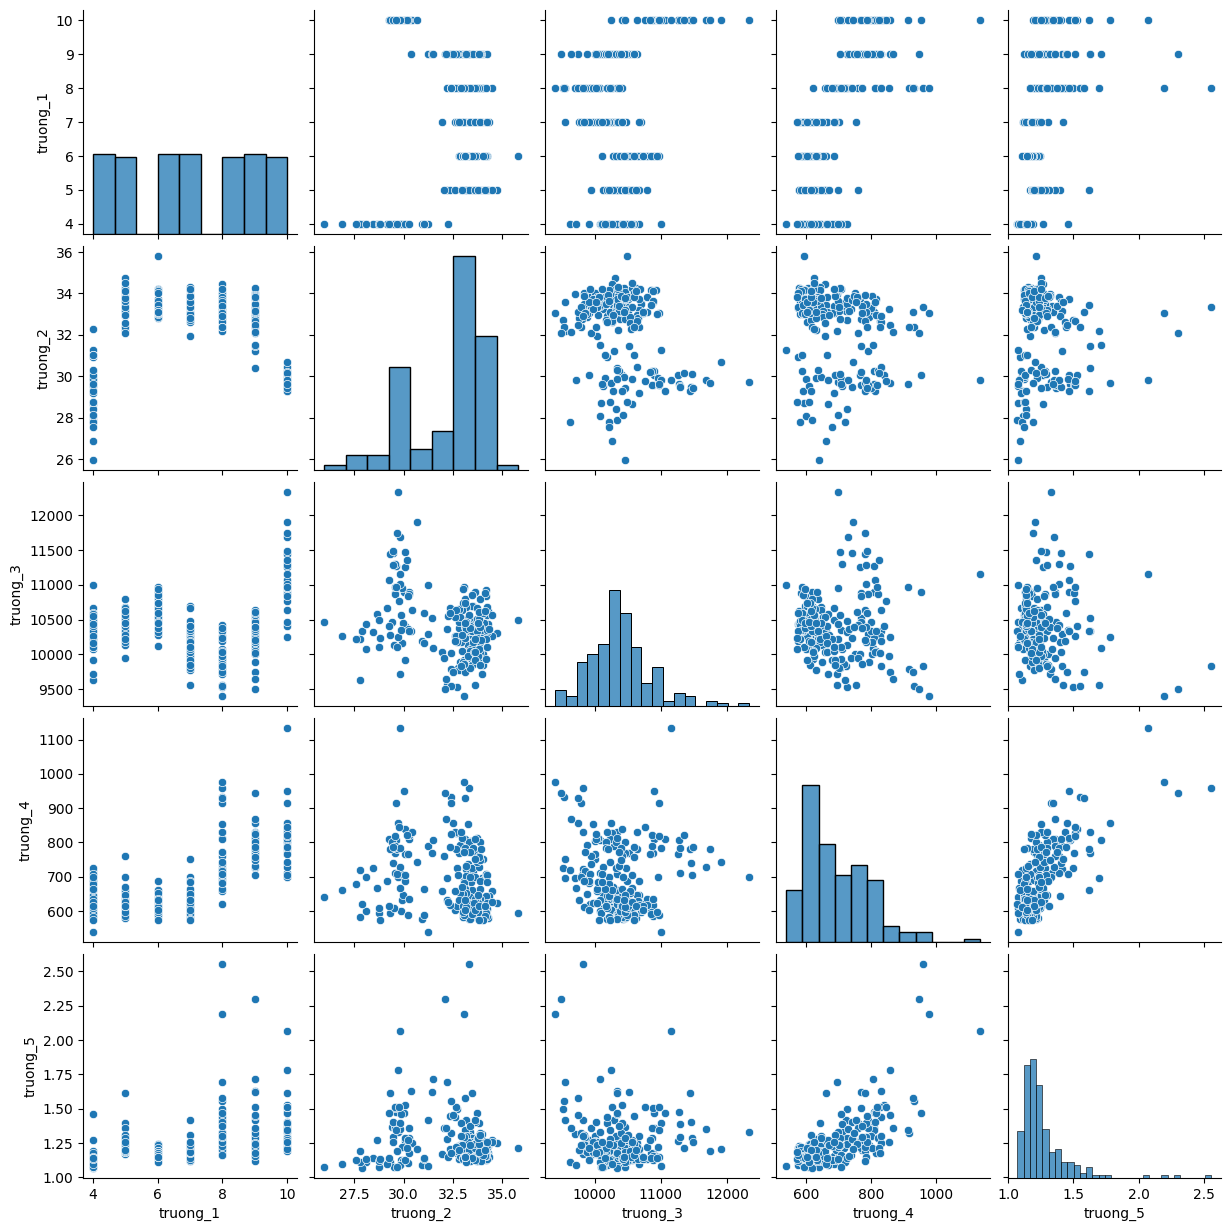

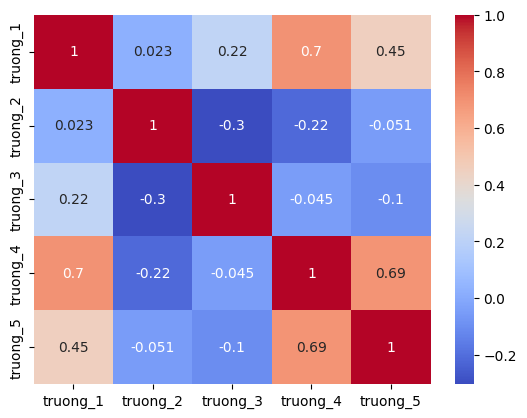

In [44]:
sns.pairplot(df[feats])
plt.show()

# Correlation matrix
corr = df[feats].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Đối với bộ dữ liệu này, khi phân tích ta nhận thấy truong_3 có khả năng là mục tiêu để dự đoán, vì vậy bài này sẽ sử dụng các thông tin từ các trường khác để dự đoán cho truong_3

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [46]:
data = df
data = data['truong_3']
print(data)

date
01-05-2013    10275.341513
01-06-2013    10306.830386
01-07-2013    10493.618771
01-08-2013    10262.245658
01-09-2013     9937.449262
                  ...     
30-11-2013    10968.565639
31-05-2013    10158.323155
31-07-2013    10735.476815
31-08-2013    10107.528158
31-10-2013     9650.926005
Name: truong_3, Length: 214, dtype: float64


In [47]:
train_size = int(len(data) * 0.9)
df_train_goc, df_test_goc = data[:train_size], data[train_size:]

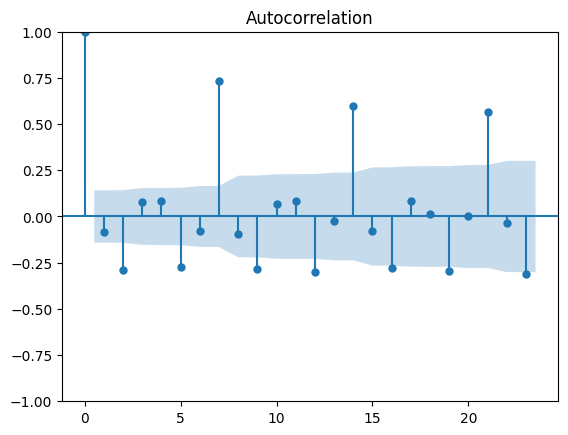

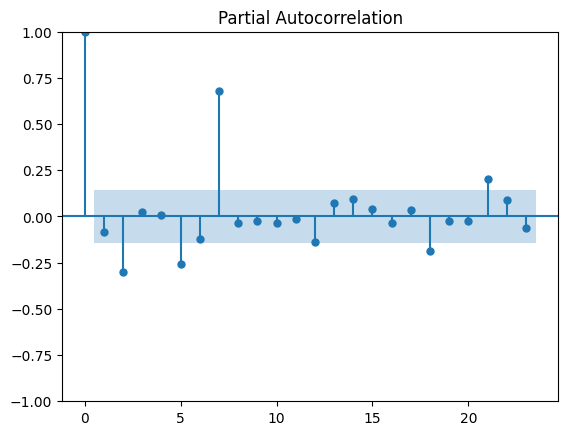

In [48]:
acf_original = plot_acf(df_train_goc)

pacf_original = plot_pacf(df_train_goc)

In [49]:
adf_test = adfuller(data)
print(f'p-value: {adf_test[1]}')

p-value: 0.0786593062132126


Giá trị của p-value = 0.874 > 0.05 nên chưa thể bác bỏ lập luận chuỗi không dừng

=> Chuỗi không dừng nên cần chuyển đổi

In [50]:
data2 = data.diff().dropna()

In [51]:
adf_test_diff = adfuller(data2)
print(f'p-value sau khi chênh lệch: {adf_test_diff[1]}')

p-value sau khi chênh lệch: 0.0


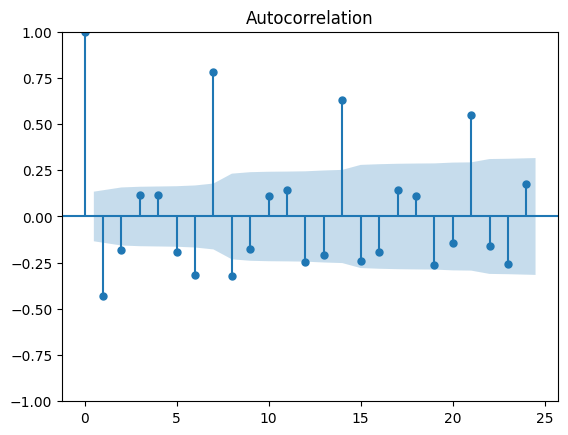

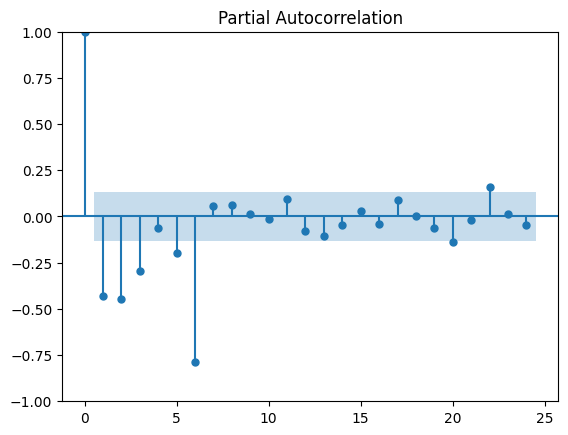

In [52]:
acf_diff = plot_acf(data2)

pacf_diff = plot_pacf(data2)

In [54]:
train_size = int(len(data2) * 0.9)
df_train, df_test = data2[:train_size], data2[train_size:]

In [58]:
# Xác định tham số p, d, q, P, D, Q, s cho mô hình SARIMA
# p,q nhìn vào 2 biểu đồ ở trên
#d chọn 0 luôn
# D thì chọn theo sai phân bậc 1 đang làm
p, d, q = 0, 0, 1
P, D, Q, s = 1, 1, 1, 30

# Mô hình SARIMA

In [59]:
# Khởi tạo và fit mô hình SARIMA
model_sarima = SARIMAX(df_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima = model_sarima.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
# Dự báo trên tập test
forecast_diff = model_fit_sarima.forecast(steps=len(df_test))
print(forecast_diff)

191   -187.783139
192    -94.683322
193    491.551440
194   -362.438413
195    -15.846297
196   -175.249013
197    -77.766066
198    614.895338
199   -415.968404
200    248.004405
201     59.742121
202   -288.213811
203    -62.090388
204     97.153826
205    144.217383
206    -94.739914
207    335.423036
208   -290.211495
209   -138.887413
210   -295.217993
211    363.275907
212    -74.805757
Name: predicted_mean, dtype: float64


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [61]:
df_pre_goc = forecast_diff.cumsum() + df_train_goc.iloc[-1]
print(df_pre_goc)

191    10548.662773
192    10453.979451
193    10945.530891
194    10583.092478
195    10567.246181
196    10391.997168
197    10314.231102
198    10929.126439
199    10513.158035
200    10761.162440
201    10820.904560
202    10532.690750
203    10470.600362
204    10567.754187
205    10711.971570
206    10617.231656
207    10952.654692
208    10662.443198
209    10523.555785
210    10228.337793
211    10591.613700
212    10516.807942
Name: predicted_mean, dtype: float64


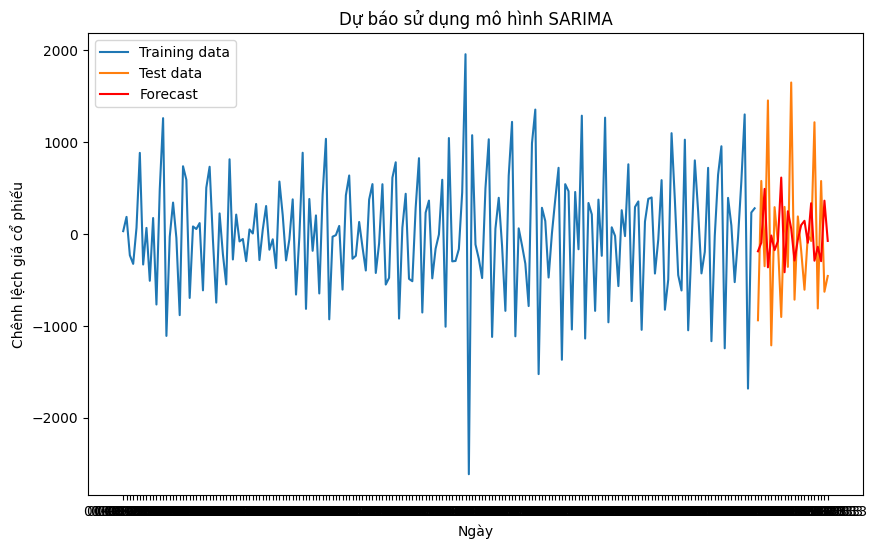

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train, label='Training data')
plt.plot(df_test.index, df_test, label='Test data')
plt.plot(df_test.index, forecast_diff, color='red', label='Forecast')
plt.title('Dự báo sử dụng mô hình SARIMA')
plt.xlabel('Ngày')
plt.ylabel('Chênh lệch giá cổ phiếu')
plt.legend()
plt.show()

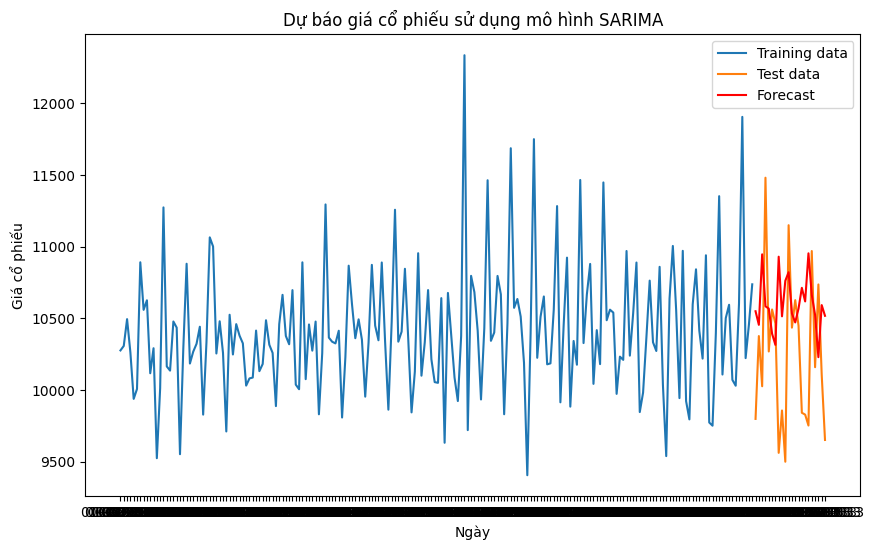

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df_train_goc.index, df_train_goc, label='Training data')
plt.plot(df_test_goc.index, df_test_goc, label='Test data')
plt.plot(df_test_goc.index, df_pre_goc, color='red', label='Forecast')
plt.title('Dự báo giá cổ phiếu sử dụng mô hình SARIMA')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.legend()
plt.show()

In [64]:
print(model_fit_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           truong_3   No. Observations:                  191
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 30)   Log Likelihood               -1237.207
Date:                            Tue, 04 Jun 2024   AIC                           2482.414
Time:                                    11:36:34   BIC                           2494.739
Sample:                                         0   HQIC                          2487.419
                                            - 191                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      8.019     -0.125      0.901     -16.716      14.716
ar.S.L30      -0.3534      0.119   

In [66]:
data2

date
01-06-2013      31.488873
01-07-2013     186.788385
01-08-2013    -231.373114
01-09-2013    -324.796396
01-10-2013      69.026315
                 ...     
30-11-2013    1216.802883
31-05-2013    -810.242484
31-07-2013     577.153659
31-08-2013    -627.948657
31-10-2013    -456.602153
Name: truong_3, Length: 213, dtype: float64

# Mô hình ARIMAX

In [67]:
data3 = df
target = 'truong_3'
exog_vars = ['truong_1', 'truong_2', 'truong_4', 'truong_5']

# Chỉ lấy các biến ngoại sinh
exog = df[exog_vars]

#Tạo và huấn luyện mô hình ARIMAX
model = SARIMAX(data3[target], exog=exog, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
results = model.fit(disp=False)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               truong_3   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1581.663
Date:                Tue, 04 Jun 2024   AIC                           3177.327
Time:                        11:48:59   BIC                           3200.856
Sample:                             0   HQIC                          3186.836
                                - 214                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
truong_1     159.4915     16.950      9.410      0.000     126.271     192.712
truong_2     -84.2862     13.330     -6.323      0.000    -110.413     -58.159
truong_4      -2.5451      0.399     -6.386      0.0

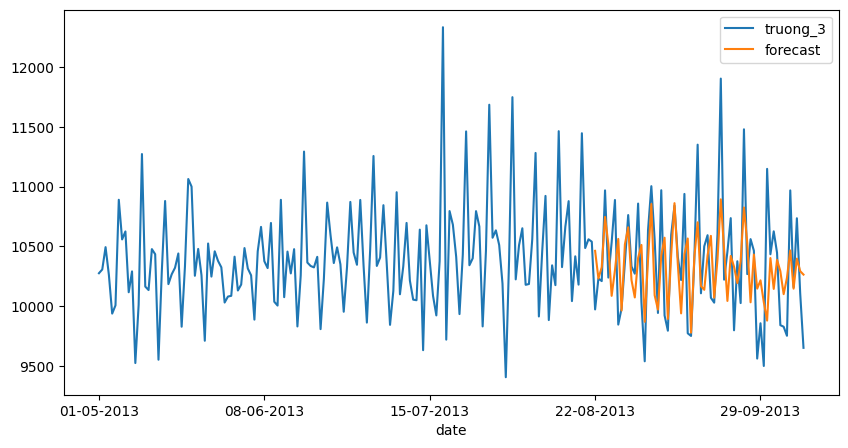

In [72]:
df['forecast'] = results.predict(start=150, end=len(df)-1, exog=exog)
df[[target, 'forecast']].plot(figsize=(10, 5))
plt.show()

In [73]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               truong_3   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1581.663
Date:                Tue, 04 Jun 2024   AIC                           3177.327
Time:                        11:49:21   BIC                           3200.856
Sample:                             0   HQIC                          3186.836
                                - 214                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
truong_1     159.4915     16.950      9.410      0.000     126.271     192.712
truong_2     -84.2862     13.330     -6.323      0.000    -110.413     -58.159
truong_4      -2.5451      0.399     -6.386      0.0